In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Activation,Dropout

In [2]:
df_data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
#df_data['NObeyesdad'].value_counts()

In [4]:
# df_x
df_data.loc()[df_data['family_history_with_overweight']=='no','family_history_with_overweight']=0
df_data.loc()[df_data['family_history_with_overweight']=='yes','family_history_with_overweight']=1

df_data.loc()[df_data['FAVC']=='no','FAVC']=0
df_data.loc()[df_data['FAVC']=='yes','FAVC']=1

df_data.loc()[df_data['SMOKE']=='no','SMOKE']=0
df_data.loc()[df_data['SMOKE']=='yes','SMOKE']=1

df_data.loc()[df_data['SCC']=='no','SCC']=0
df_data.loc()[df_data['SCC']=='yes','SCC']=1

df_data.loc()[df_data['CAEC']=='No','CAEC']=1
df_data.loc()[df_data['CAEC']=='no','CAEC']=1
df_data.loc()[df_data['CAEC']=='Sometimes','CAEC']=2
df_data.loc()[df_data['CAEC']=='Frequently','CAEC']=3
df_data.loc()[df_data['CAEC']=='Always','CAEC']=4

df_data.loc()[df_data['CALC']=='no','CALC']=1
df_data.loc()[df_data['CALC']=='Sometimes','CALC']=2
df_data.loc()[df_data['CALC']=='Frequently','CALC']=3
df_data.loc()[df_data['CALC']=='Always','CALC']=4

df_data.loc()[df_data['Gender']=='Female','Gender']=0
df_data.loc()[df_data['Gender']=='Male','Gender']=1
df_data
df_data.loc()[df_data['MTRANS']=='Public_Transportation','MTRANS']=0
df_data.loc()[df_data['MTRANS']=='Walking','MTRANS']=1

df_data.loc()[df_data['NObeyesdad']=='Normal_Weight','NObeyesdad']=0
df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_I','NObeyesdad']=1
df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_II','NObeyesdad']=2

df_data.loc()[df_data['NObeyesdad']=='Obesity_Type_III','NObeyesdad']=3

df_data.loc()[df_data['NObeyesdad']=='Overweight_Level_I','NObeyesdad']=4
df_data.loc()[df_data['NObeyesdad']=='Overweight_Level_II','NObeyesdad']=5
df_data.loc()[df_data['NObeyesdad']=='Insufficient_Weight','NObeyesdad']=6

In [5]:
df_data[['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC']]=df_data[
    ['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC']
].astype(int)


In [6]:
df_x=df_data.drop(['NObeyesdad'],axis=1)
df_y=df_data.loc[:,'NObeyesdad']

x = pd.get_dummies(df_x)
y = pd.get_dummies(df_y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [7]:
#資料前處理

In [8]:
input_layer = Input(shape=(x_train.shape[1],))
dense_layer_1 =Dense(32,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='relu', name ="nl1" )(input_layer)
dense_layer_2 = Dense(16,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu', name ="nl2" )(dense_layer_1)
dense_layer_2 = Dense(10,activation='relu', name ="nl3" )(dense_layer_2)
dense_layer_2 = Dense(10,activation='relu', name ="nl4" )(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)
output = Dense(y_train.shape[1],activation='softmax')(dense_layer_2)
model = Model(inputs=input_layer, outputs=output)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
nl1 (Dense)                  (None, 32)                704       
_________________________________________________________________
nl2 (Dense)                  (None, 16)                528       
_________________________________________________________________
nl3 (Dense)                  (None, 10)                170       
_________________________________________________________________
nl4 (Dense)                  (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 7)                 77    

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
              )
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 1s 574us/step - loss: 2.1443 - precision: 0.2879 - recall: 0.0278
Epoch 2/50
338/338 [==============================] - 0s 521us/step - loss: 1.8769 - precision: 0.6869 - recall: 0.0316
Epoch 3/50
338/338 [==============================] - 0s 502us/step - loss: 1.8099 - precision: 0.6409 - recall: 0.0235
Epoch 4/50
338/338 [==============================] - 0s 503us/step - loss: 1.5515 - precision: 0.6157 - recall: 0.1149
Epoch 5/50
338/338 [==============================] - 0s 494us/step - loss: 1.2349 - precision: 0.7242 - recall: 0.2297
Epoch 6/50
338/338 [==============================] - 0s 500us/step - loss: 1.1601 - precision: 0.7352 - recall: 0.2422
Epoch 7/50
338/338 [==============================] - 0s 530us/step - loss: 1.0709 - precision: 0.7830 - recall: 0.3089
Epoch 8/50
338/338 [==============================] - 0s 506us/step - loss: 1.0769 - precision: 0.7216 - recall: 0.2954
Epoch 9/50
338/338 [====================

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='acc',mode='max', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = [tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.Accuracy()]
              )
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 1s 518us/step - loss: 0.8908 - precision_1: 0.7719 - recall_1: 0.4652 - accuracy: 0.1191
Epoch 2/50
338/338 [==============================] - 0s 512us/step - loss: 0.8208 - precision_1: 0.7695 - recall_1: 0.4672 - accuracy: 0.1268
Epoch 3/50
338/338 [==============================] - 0s 518us/step - loss: 0.8296 - precision_1: 0.7564 - recall_1: 0.4790 - accuracy: 0.1318
Epoch 4/50
338/338 [==============================] - 0s 535us/step - loss: 0.7847 - precision_1: 0.7800 - recall_1: 0.5149 - accuracy: 0.1237
Epoch 5/50
338/338 [==============================] - 0s 837us/step - loss: 0.9569 - precision_1: 0.7263 - recall_1: 0.4655 - accuracy: 0.1373
Epoch 6/50
338/338 [==============================] - 0s 537us/step - loss: 0.9046 - precision_1: 0.7477 - recall_1: 0.4564 - accuracy: 0.1290   
Epoch 7/50
338/338 [==============================] - 0s 547us/step - loss: 0.7992 - precision_1: 0.7953 - recall_1: 0.5236 - accuracy: 0.1

338/338 [==============================] - 0s 559us/step - loss: 0.8314 - precision_1: 0.7618 - recall_1: 0.5327 - accuracy: 0.1612
Epoch 30/50
338/338 [==============================] - 0s 520us/step - loss: 0.6876 - precision_1: 0.8193 - recall_1: 0.5781 - accuracy: 0.1671
Epoch 31/50
338/338 [==============================] - 0s 527us/step - loss: 0.7782 - precision_1: 0.7715 - recall_1: 0.5768 - accuracy: 0.1611
Epoch 32/50
338/338 [==============================] - 0s 536us/step - loss: 0.7444 - precision_1: 0.8040 - recall_1: 0.5704 - accuracy: 0.1747
Epoch 33/50
338/338 [==============================] - 0s 521us/step - loss: 0.6809 - precision_1: 0.7948 - recall_1: 0.5939 - accuracy: 0.1721
Epoch 34/50
338/338 [==============================] - 0s 539us/step - loss: 0.6526 - precision_1: 0.8162 - recall_1: 0.6277 - accuracy: 0.1758
Epoch 35/50
338/338 [==============================] - 0s 545us/step - loss: 0.7271 - precision_1: 0.7879 - recall_1: 0.5879 - accuracy: 0.1702
Epoc

In [11]:
preds = model.evaluate(x = x_test, y = y_test)

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print(preds)
print(F1)

14/14 [==============================] - 0s 614us/step - loss: 0.5700 - precision_1: 0.8240 - recall_1: 0.6974 - accuracy: 0.2425
[0.5700490474700928, 0.8240223526954651, 0.6973995566368103, 0.2424856424331665]
0.7554417612940151


In [12]:
reds = model.evaluate(x = x_test, y = y_test)

F1 = 2 * (preds[1] * preds[2]) / (preds[1] + preds[2])
print('Precision', preds[1])
print('Recall}', preds[2])
print('F1',F1)

14/14 [==============================] - 0s 614us/step - loss: 0.5700 - precision_1: 0.8240 - recall_1: 0.6974 - accuracy: 0.2425
Precision 0.8240223526954651
Recall} 0.6973995566368103
F1 0.7554417612940151


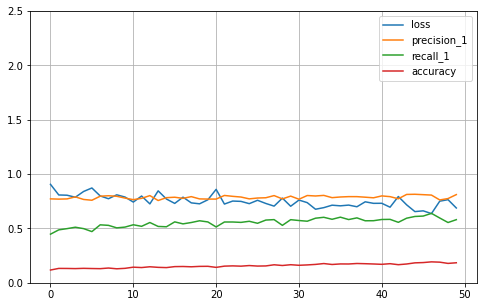

In [13]:

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)
plt.show()

In [14]:
df_test_y_predicted = model.predict(x_test)

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error
print('RMSE为：',np.sqrt(mean_squared_error(y_test,df_test_y_predicted)))

RMSE为： 0.20809837


In [17]:
import scipy
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_percentage_errorS
print('MAPE为：',mean_squared_error(y_test,df_test_y_predicted))

MAPE为： 0.043304928


In [18]:
from sklearn.metrics import mean_absolute_error
print('MAE为：',mean_absolute_error(y_test,df_test_y_predicted))

MAE为： 0.081496365


# value

In [19]:
df_data.drop(['NObeyesdad'],axis=1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,3,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,3,1
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,0


In [20]:
df_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,1,0,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,0,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,3,0,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,3,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,0,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,0,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,0,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,0,3


In [21]:
df_x=df_data.drop(['Height'],axis=1)

df_y=df_data.loc[:,'Height']

In [22]:
x = pd.get_dummies(df_x)
y = pd.get_dummies(df_y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [23]:
input_layer = Input(shape=(x_train.shape[1],))
dense_layer_1 =Dense(32,kernel_initializer=tf.keras.initializers.GlorotNormal() ,activation='relu', name ="nl1" )(input_layer)
dense_layer_2 = Dense(16,kernel_initializer=tf.keras.initializers.GlorotNormal(),activation='relu', name ="nl2" )(dense_layer_1)
dense_layer_2 = Dense(10,activation='relu', name ="nl3" )(dense_layer_2)
dense_layer_2 = Dense(10,activation='relu', name ="nl4" )(dense_layer_2)
dense_layer_2 = Dropout(0.5)(dense_layer_2)
output = Dense(y_train.shape[1],activation='softmax')(dense_layer_2)
model = Model(inputs=input_layer, outputs=output)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
nl1 (Dense)                  (None, 32)                896       
_________________________________________________________________
nl2 (Dense)                  (None, 16)                528       
_________________________________________________________________
nl3 (Dense)                  (None, 10)                170       
_________________________________________________________________
nl4 (Dense)                  (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1574)              1731

In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss="mean_squared_error",metrics=['mean_squared_error']
              
              )
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 1s 610us/step - loss: 6.3492e-04 - mean_squared_error: 6.3492e-04
Epoch 2/50
338/338 [==============================] - 0s 627us/step - loss: 6.3472e-04 - mean_squared_error: 6.3472e-04
Epoch 3/50
338/338 [==============================] - 0s 616us/step - loss: 6.3449e-04 - mean_squared_error: 6.3449e-04
Epoch 4/50
338/338 [==============================] - 0s 678us/step - loss: 6.3431e-04 - mean_squared_error: 6.3431e-04
Epoch 5/50
338/338 [==============================] - 0s 636us/step - loss: 6.3437e-04 - mean_squared_error: 6.3437e-04
Epoch 6/50
338/338 [==============================] - 0s 676us/step - loss: 6.3453e-04 - mean_squared_error: 6.3453e-04
Epoch 7/50
338/338 [==============================] - 0s 708us/step - loss: 6.3441e-04 - mean_squared_error: 6.3441e-04
Epoch 8/50
338/338 [==============================] - 0s 648us/step - loss: 6.3357e-04 - mean_squared_error: 6.3357e-04
Epoch 9/50
338/338 [====================

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='acc',mode='max', patience=5)
Adam = tf.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.997, epsilon=1e-08, decay=0.0)
model.compile(optimizer=Adam, 
              loss="mean_squared_error",metrics=['mean_squared_error'])
history = model.fit(x=x_train, y=y_train,  epochs=50,batch_size =5, callbacks=[callback] )

Epoch 1/50
338/338 [==============================] - 1s 601us/step - loss: 6.3073e-04 - mean_squared_error: 6.3073e-04
Epoch 2/50
338/338 [==============================] - 0s 610us/step - loss: 6.3112e-04 - mean_squared_error: 6.3112e-04
Epoch 3/50
338/338 [==============================] - 0s 607us/step - loss: 6.2986e-04 - mean_squared_error: 6.2986e-04
Epoch 4/50
338/338 [==============================] - 0s 659us/step - loss: 6.2906e-04 - mean_squared_error: 6.2906e-04
Epoch 5/50
338/338 [==============================] - 0s 626us/step - loss: 6.2999e-04 - mean_squared_error: 6.2999e-04
Epoch 6/50
338/338 [==============================] - 0s 648us/step - loss: 6.2976e-04 - mean_squared_error: 6.2976e-04
Epoch 7/50
338/338 [==============================] - 0s 598us/step - loss: 6.2898e-04 - mean_squared_error: 6.2898e-04
Epoch 8/50
338/338 [==============================] - 0s 598us/step - loss: 6.2966e-04 - mean_squared_error: 6.2966e-04
Epoch 9/50
338/338 [====================

338/338 [==============================] - 0s 630us/step - loss: 6.2844e-04 - mean_squared_error: 6.2844e-04
Epoch 34/50
338/338 [==============================] - 0s 613us/step - loss: 6.2757e-04 - mean_squared_error: 6.2757e-04
Epoch 35/50
338/338 [==============================] - 0s 592us/step - loss: 6.2692e-04 - mean_squared_error: 6.2692e-04
Epoch 36/50
338/338 [==============================] - 0s 616us/step - loss: 6.3105e-04 - mean_squared_error: 6.3105e-04
Epoch 37/50
338/338 [==============================] - 0s 642us/step - loss: 6.2847e-04 - mean_squared_error: 6.2847e-04
Epoch 38/50
338/338 [==============================] - 0s 696us/step - loss: 6.2806e-04 - mean_squared_error: 6.2806e-04
Epoch 39/50
338/338 [==============================] - 0s 600us/step - loss: 6.2881e-04 - mean_squared_error: 6.2881e-04
Epoch 40/50
338/338 [==============================] - 0s 610us/step - loss: 6.2899e-04 - mean_squared_error: 6.2899e-04
Epoch 41/50
338/338 [=======================

In [26]:
df_test_y_predicted = model.predict(x_test)

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error
print('RMSE为：',np.sqrt(mean_squared_error(y_test,df_test_y_predicted)))

RMSE为： 0.025082827


In [28]:
import scipy
import sklearn
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_percentage_error
print('MAPE为：',mean_squared_error(y_test,df_test_y_predicted))

MAPE为： 0.0006291482


In [29]:
from sklearn.metrics import mean_absolute_error
print('MAE为：',mean_absolute_error(y_test,df_test_y_predicted))

MAE为： 0.0012587464
